In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("bike.csv")
df.head(2)

In [13]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour

In [10]:
df["casual"].plot.box()

In [15]:
df[["casual", "registered"]].plot.box()

<AxesSubplot:xlabel='hour'>

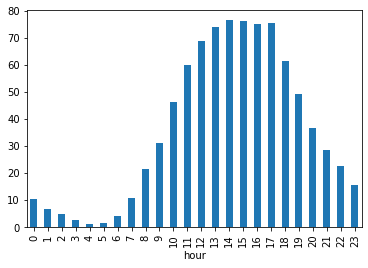

In [14]:
df_hour = df.groupby("hour")["casual"].mean()
df_hour.plot.bar()

In [41]:
df = pd.read_csv("stock_kr_daily_m_211005_211008/stock_m_20211005.csv",
                 low_memory=False)
df.head(2)

stock_cd  cont_time  price  p_start  p_max  p_min  cum_cnt  cont_cnt
0   155660     153000   8320     8320   8320   8320   832514     10738
1   155660     152900   8390     8390   8390   8390   821776         0

In [19]:
len(df)

911030

In [24]:
df_stat = df.groupby("stock_cd")["price"].agg(["std", "mean"]).reset_index()
# df_stat.head(2)

In [30]:
df_stat["CV"] = df_stat["std"] / df_stat["mean"]
df_stat.head(2)

In [29]:
df_stat["CV"].describe()

In [27]:
df_list = pd.read_csv("stock_kr_daily_m_211005_211008/stock_list_kr_20211005.csv")
df_list.head(2)

stock_cd  state_cd stock_nm  price  vs_y  vs_y_sign  vs_y_rate  cum_cnt  \
0   155660         0      DSR   8400   900          2      12.00  1533447   
1   096640        57      멜파스   1760   185          2      11.75  7443625   

     cum_price  sel_q  ...  con_ll_days  con_up_days  con_dn_days  \
0  12520686510   3172  ...            0            1            3   
1  13136275225  23687  ...            0            1            4   

   con_st_days  biz_kr  theme_kr_1  theme_kr_2  theme_cd_1 theme_cd_2 call_cnt  
0            0   철강.금속       섬유/의류         NaN       931.0        NaN     2147  
1            0    IT부품         LCD       터치스크린         3.0      375.0     2147  

[2 rows x 24 columns]

### Q. 10월 5일자 주식 분봉데이터를 기반으로 각 종목별 변동계수를 계산하고 변동계수가 제 3사분위수 보다 큰 종목을 선별하여 해당 종목코드와 종목명을 매칭하고 각 종목의 종목명을 확인해보시오.
※ 데이터: stock_m_20211005.csv  
※ 종목명: stock_list_kr_20211005.csv  

In [31]:
df = pd.read_csv("stock_kr_daily_m_211005_211008/stock_m_20211005.csv",
                 low_memory=False)
df_stat = df.groupby("stock_cd")["price"].agg(["std", "mean"]).reset_index()
df_stat["CV"] = df_stat["std"] / df_stat["mean"]
df_stat.head(2)

stock_cd        std          mean        CV
0   000040   7.790655    952.332481  0.008181
1   000050  66.145084  13420.460358  0.004929

In [32]:
df_list = pd.read_csv("stock_kr_daily_m_211005_211008/stock_list_kr_20211005.csv")
df_list.head(2)

stock_cd  state_cd stock_nm  price  vs_y  vs_y_sign  vs_y_rate  cum_cnt  \
0   155660         0      DSR   8400   900          2      12.00  1533447   
1   096640        57      멜파스   1760   185          2      11.75  7443625   

     cum_price  sel_q  ...  con_ll_days  con_up_days  con_dn_days  \
0  12520686510   3172  ...            0            1            3   
1  13136275225  23687  ...            0            1            4   

   con_st_days  biz_kr  theme_kr_1  theme_kr_2  theme_cd_1 theme_cd_2 call_cnt  
0            0   철강.금속       섬유/의류         NaN       931.0        NaN     2147  
1            0    IT부품         LCD       터치스크린         3.0      375.0     2147  

[2 rows x 24 columns]

In [37]:
df_join = pd.merge(df_stat.loc[df_stat["CV"] >= df_stat["CV"].quantile(0.75), ],
                   df_list[["stock_cd", "stock_nm"]], 
                   left_on = "stock_cd", right_on = "stock_cd",
                   how = "inner")
df_join.head(2)

stock_cd         std          mean        CV stock_nm
0   000080  504.221799  33389.386189  0.015101    하이트진로
1   000227  367.148944  21793.094629  0.016847  유유제약2우B

In [38]:
len(df_join)

583

In [48]:
stock_list = ["KB금융", "DB금융투자", "BNK금융지주"]

In [49]:
df_list_sub = df_list.loc[df_list["stock_nm"].isin(stock_list), ]
df_list_sub

stock_cd  state_cd stock_nm  price  vs_y  vs_y_sign  vs_y_rate  cum_cnt  \
1137   105560        55     KB금융  55800  1600          2       2.95  1350703   
1572   016610        55   DB금융투자   6430   120          2       1.90    79662   
1791   138930        55  BNK금융지주   8720   110          2       1.28  1166286   

        cum_price  sel_q  ...  con_ll_days  con_up_days  con_dn_days  \
1137  74982392200   4020  ...            0            1            3   
1572    510310380   5724  ...            0            1            3   
1791  10126584060   9462  ...            0            1            1   

      con_st_days  biz_kr  theme_kr_1  theme_kr_2  theme_cd_1 theme_cd_2  \
1137            0     금융업          은행         NaN       324.0        NaN   
1572            0      증권          증권         NaN       285.0        NaN   
1791            0     금융업          은행         NaN       324.0        NaN   

     call_cnt  
1137     2147  
1572     2147  
1791     2147  

[3 rows x 24 columns]

In [51]:
df_sub = df.loc[df["stock_cd"].isin(df_list_sub["stock_cd"]), ]
df_sub.head(2)

In [54]:
cd_test = df_sub["stock_cd"].unique()
cd_test

array(['105560', '016610', '138930'], dtype=object)

In [53]:
from scipy.stats import bartlett

In [56]:
stat, p = bartlett(df_sub.loc[df_sub["stock_cd"] == cd_test[0], "price"],
                   df_sub.loc[df_sub["stock_cd"] == cd_test[1], "price"],
                   df_sub.loc[df_sub["stock_cd"] == cd_test[2], "price"])
print(stat)
print(p)

1412.3721510803605
2.029010039817425e-307


세 집단의 등분산 검정 결과 p-value가 0($2.029 \times 10^{-307}$)으로 유의수준 5%(0.05) 보다 작음으로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 적어도 한 쌍의 집단간 분산이 다르다는 대립가설을 채택한다.

In [58]:
values = df_sub.loc[df_sub["stock_cd"] == cd_test[0], "price"]
stat, p = bartlett(values,
                   values * 1.1)
print(stat)
print(p)

3.5328916806979223
0.0601627757928591


두 집단의 등분산 검정 결과 p-value가 0.06으로 유의수준 5%(0.05) 보다 큼으로 귀무가설을 기각하지 못한다. 즉, "집단간 분산이 같다"는 귀무가설을 기각하지 못한다.

### Q. values 객체의 값을 대상으로 정규성 검정(Shapiro-Wilk)을 실시하고 그 결과를 해석하시오.

In [59]:
from scipy.stats import shapiro

In [61]:
stat, p = shapiro(values)
print(p)

2.5064011310860224e-08


p-value < 유의수준($\alpha$) : 귀무가설을 기각하고 대립가설 채택  
정규분포를 따르지 않음.